<a href="https://colab.research.google.com/github/jaehyun99/Computer_Vision/blob/main/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def ROI_selection(img, vertices):
  mask = np.zeros_like(img)
  cv2.fillPoly(mask, vertices, (255))
  return cv2.bitwise_and(img, mask)

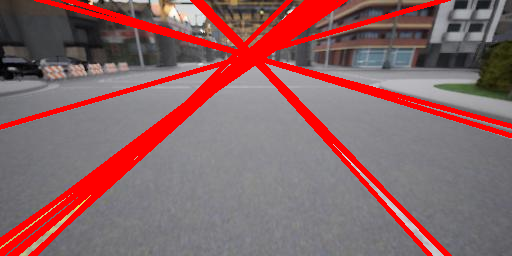

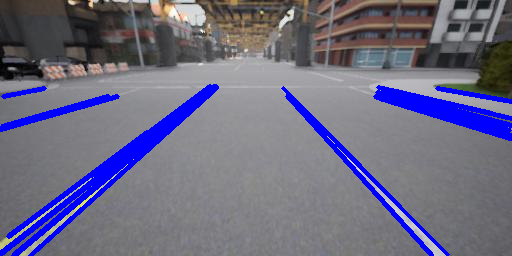

In [ ]:
img = cv2.imread('drive/MyDrive/PR201910807/images/lab05/lane02.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width = img.shape[:2]
vertices = np.array([[(0, height//3),
                      (0, height),
                      (width, height),
                      (width, height//3)]])

canny = cv2.Canny(gray_img, 70 , 150)

maskimg = ROI_selection(canny, vertices)

lines = cv2.HoughLines(maskimg, rho = 1, theta = np.pi/180, threshold = 100,)
result = np.copy(img)

if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(result, pt1, pt2, (0,0,255), 3)

cv2_imshow(result)

linesp = cv2.HoughLinesP(maskimg, rho =1, theta = np.pi/180, threshold = 30, minLineLength=10, maxLineGap=10)
result = np.copy(img)

for line in linesp:
    x1, y1, x2, y2 = line[0]
    cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 3)

cv2_imshow(result)

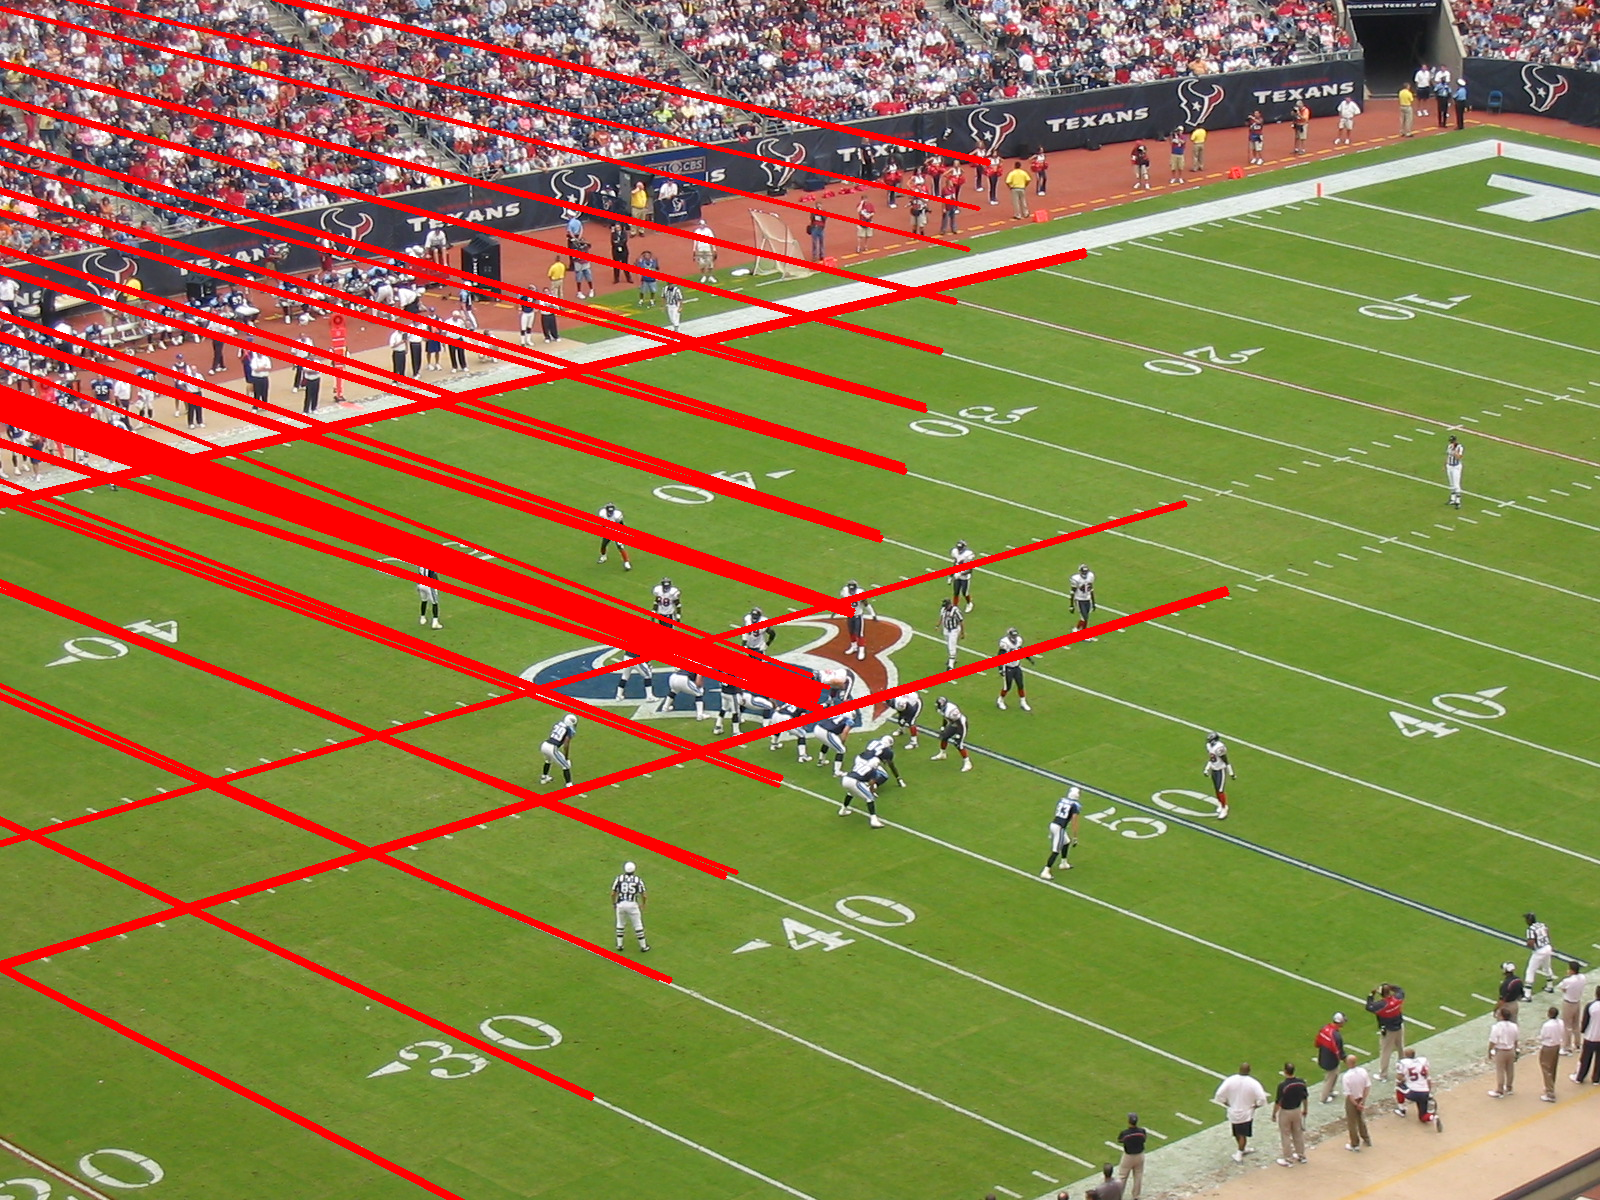

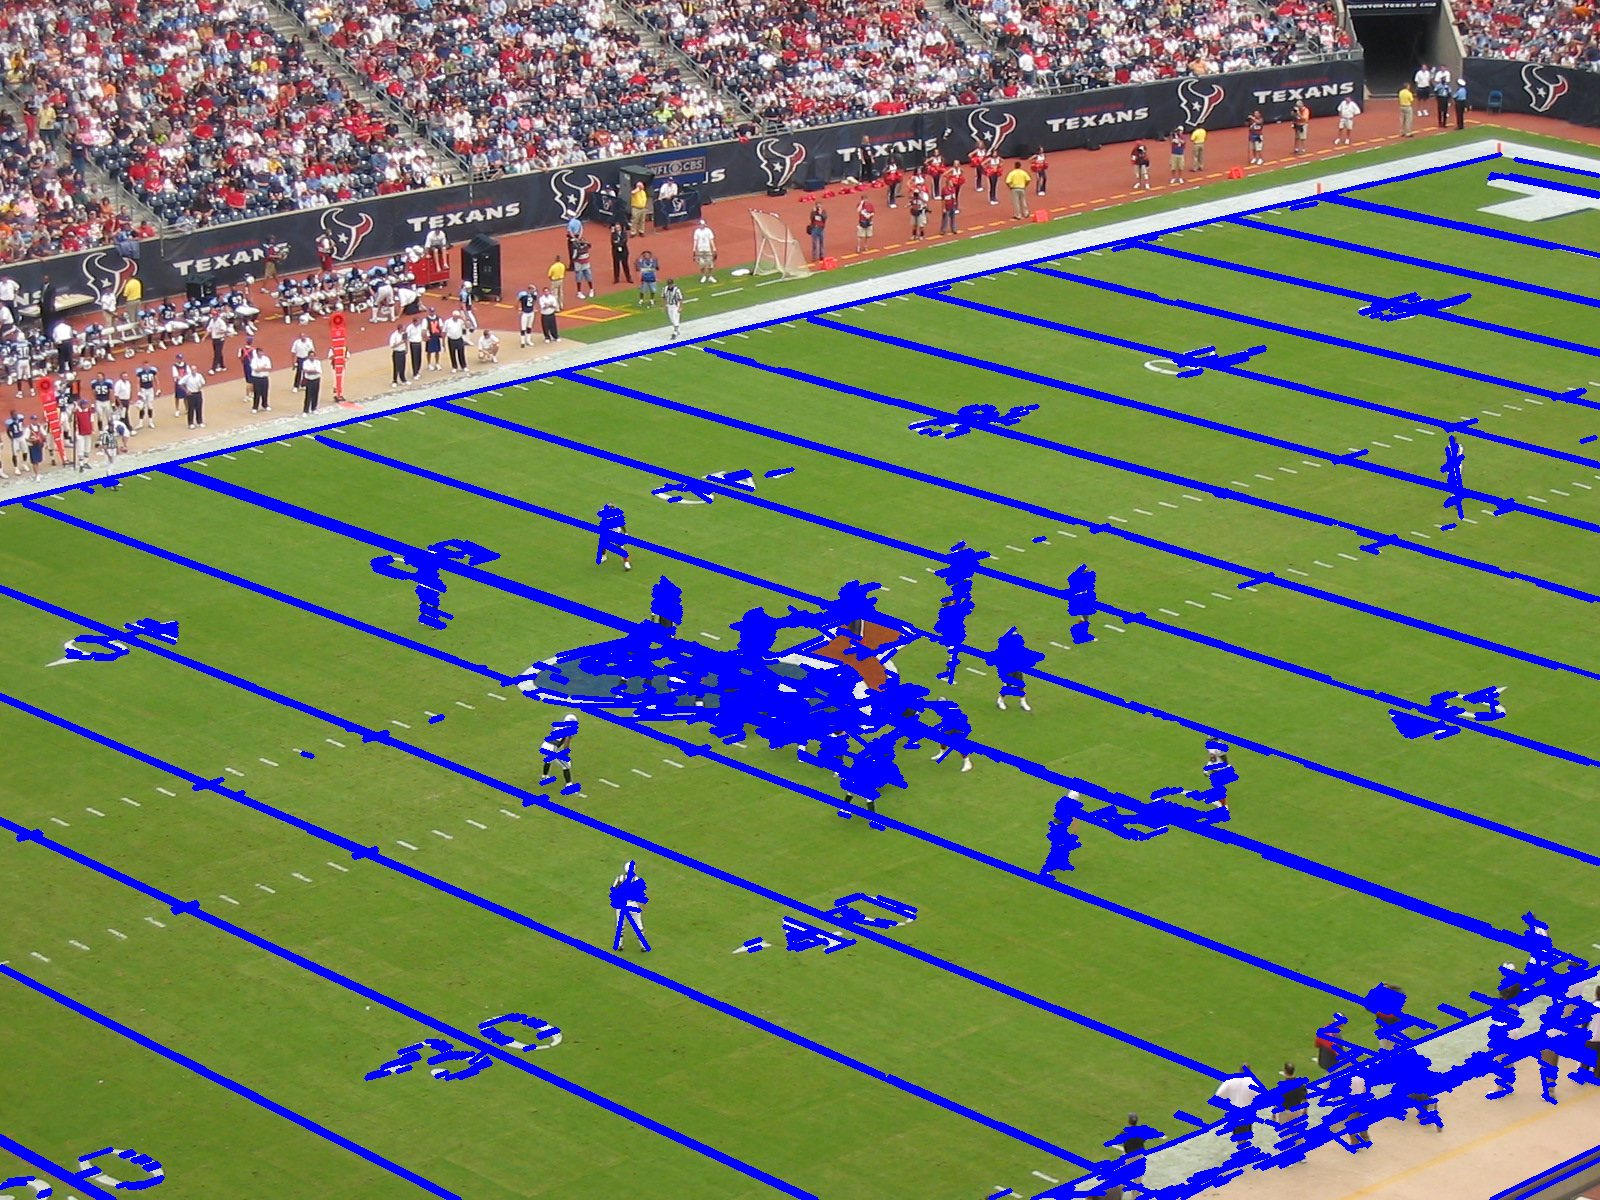

In [ ]:
img = cv2.imread('drive/MyDrive/PR201910807/images/lab05/football.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width = img.shape[:2]
vertices = np.array([[(0, 500),
                      (0, height),
                      (width, height),
                      (width, 130)]])

canny = cv2.Canny(gray_img, 70 , 150)

maskimg = ROI_selection(canny, vertices)

lines = cv2.HoughLines(maskimg, rho = 1, theta = np.pi/180, threshold = 250,)
result = np.copy(img)

if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(result, pt1, pt2, (0,0,255), 3)

cv2_imshow(result)

linesp = cv2.HoughLinesP(maskimg, rho =1, theta = np.pi/180, threshold = 50, minLineLength=10, maxLineGap=10)
result = np.copy(img)

for line in linesp:
    x1, y1, x2, y2 = line[0]
    cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 3)

cv2_imshow(result)